# Projet Unsupervised Machine Learning : Clustering De Vins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Configuration pour les graphiques
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# 1. Chargement et exploration des données
def load_data(file_path):
    """Charge les données depuis le fichier CSV"""
    df = pd.read_csv(file_path)
    return df

# Charger les données (remplacez par le chemin de votre fichier)
df = load_data('data/wine-clustering.csv')

print("=== EXPLORATION DES DONNÉES ===")
print(f"Forme du dataset: {df.shape}")
print(f"\nPremières lignes:")
print(df.head())

print(f"\nInformations sur le dataset:")
print(df.info())

print(f"\nStatistiques descriptives:")
print(df.describe())

print(f"\nValeurs manquantes:")
print(df.isnull().sum())

=== EXPLORATION DES DONNÉES ===
Forme du dataset: (178, 13)

Premières lignes:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Pro

In [3]:
# 2. Préparation des données
def prepare_data(df):
    """Standardise les données pour le clustering"""
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    return data_scaled, scaler

data_scaled, scaler = prepare_data(df)
print(f"\nDonnées standardisées - Forme: {data_scaled.shape}")



Données standardisées - Forme: (178, 13)


  File "C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


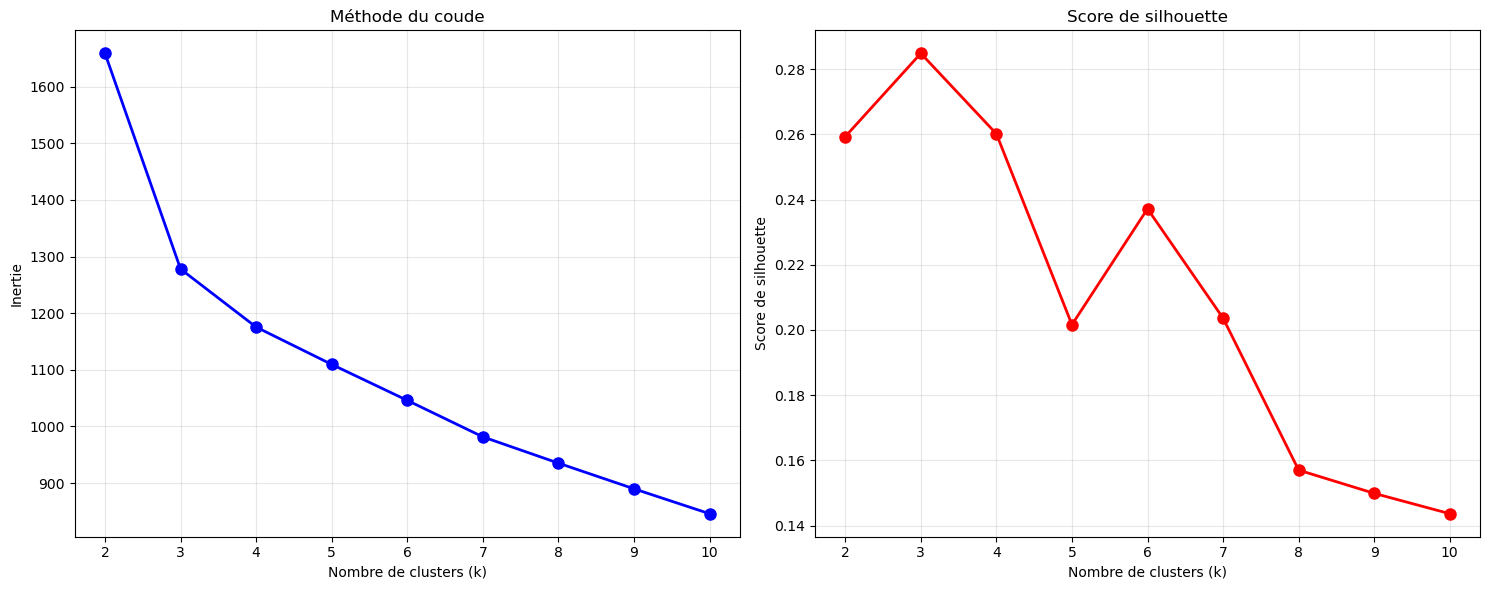


=== SCORES DE SILHOUETTE ===
k=2: 0.2593
k=3: 0.2849
k=4: 0.2602
k=5: 0.2016
k=6: 0.2372
k=7: 0.2036
k=8: 0.1570
k=9: 0.1499
k=10: 0.1436


In [5]:
# 3. Détermination du nombre optimal de clusters
def find_optimal_clusters(data, max_k=10):
    """Trouve le nombre optimal de clusters avec la méthode du coude et silhouette"""
    inertias = []
    silhouette_scores = []
    K_range = range(2, max_k + 1)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    return K_range, inertias, silhouette_scores

K_range, inertias, silhouette_scores = find_optimal_clusters(data_scaled)

# Visualisation pour choisir le nombre optimal de clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Méthode du coude
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Nombre de clusters (k)')
ax1.set_ylabel('Inertie')
ax1.set_title('Méthode du coude')
ax1.grid(True, alpha=0.3)

# Score de silhouette
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Nombre de clusters (k)')
ax2.set_ylabel('Score de silhouette')
ax2.set_title('Score de silhouette')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Afficher les scores de silhouette
print("\n=== SCORES DE SILHOUETTE ===")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")


In [6]:
# 4. Application du clustering K-means
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nNombre optimal de clusters (basé sur silhouette): {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data_scaled)

print(f"Clustering terminé avec {optimal_k} clusters")
print(f"Répartition des clusters:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} échantillons")



Nombre optimal de clusters (basé sur silhouette): 3
Clustering terminé avec 3 clusters
Répartition des clusters:
  Cluster 0: 65 échantillons
  Cluster 1: 51 échantillons
  Cluster 2: 62 échantillons


In [7]:
# 5. Analyse des résultats
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

print(f"\n=== CARACTÉRISTIQUES MOYENNES PAR CLUSTER ===")
cluster_means = df_clustered.groupby('Cluster').mean()
print(cluster_means.round(2))



=== CARACTÉRISTIQUES MOYENNES PAR CLUSTER ===
         Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
Cluster                                                                      
0          12.25        1.90  2.23         20.06      92.74           2.25   
1          13.13        3.31  2.42         21.24      98.67           1.68   
2          13.68        2.00  2.47         17.46     107.97           2.85   

         Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
Cluster                                                                       
0              2.05                  0.36             1.62             2.97   
1              0.82                  0.45             1.15             7.23   
2              3.00                  0.29             1.92             5.45   

          Hue  OD280  Proline  
Cluster                        
0        1.06   2.80   510.17  
1        0.69   1.70   619.06  
2        1.07   3.16  1100.23  


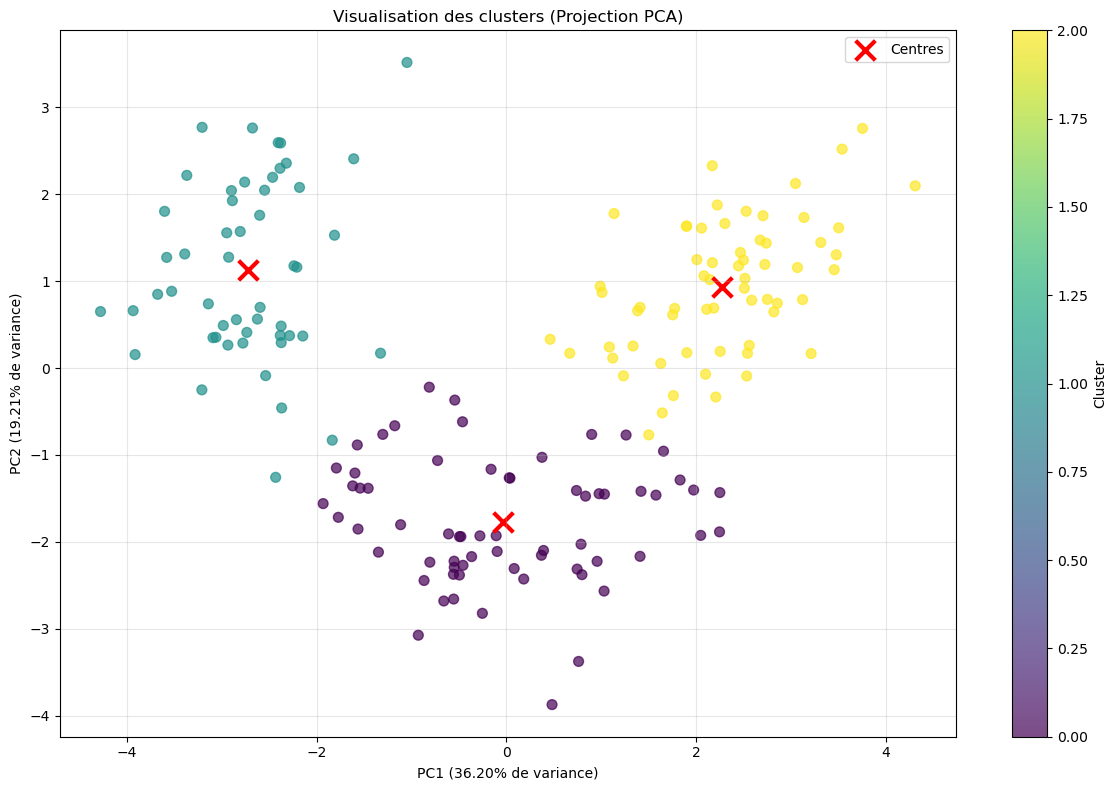

Variance expliquée par les 2 premières composantes: 55.41%


In [8]:
# 6. Visualisation avec PCA
def visualize_clusters_pca(data_scaled, labels, df):
    """Visualise les clusters avec une réduction PCA"""
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)
    
    plt.figure(figsize=(12, 8))
    
    # Scatter plot des clusters
    scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], 
                         c=labels, cmap='viridis', alpha=0.7, s=50)
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} de variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} de variance)')
    plt.title('Visualisation des clusters (Projection PCA)')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    
    # Ajouter les centres des clusters
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
               c='red', marker='x', s=200, linewidths=3, label='Centres')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Variance expliquée par les 2 premières composantes: {sum(pca.explained_variance_ratio_):.2%}")
    
    return pca, data_pca

pca, data_pca = visualize_clusters_pca(data_scaled, cluster_labels, df)


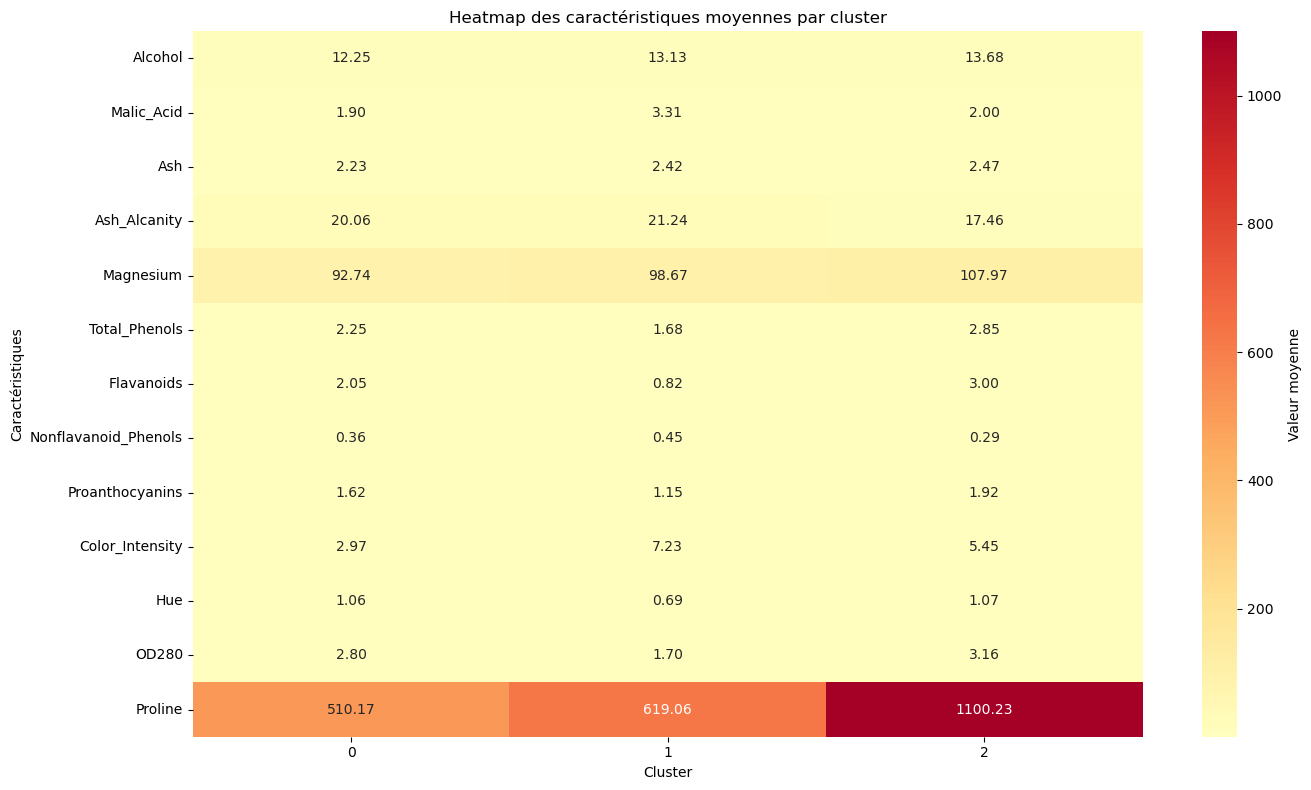

In [9]:
# 7. Heatmap des caractéristiques par cluster
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means.T, annot=True, cmap='RdYlBu_r', 
            center=0, fmt='.2f', cbar_kws={'label': 'Valeur moyenne'})
plt.title('Heatmap des caractéristiques moyennes par cluster')
plt.xlabel('Cluster')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()


In [10]:
# 8. Analyse détaillée par cluster
print(f"\n=== ANALYSE DÉTAILLÉE PAR CLUSTER ===")
for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    print(f"\n--- CLUSTER {cluster_id} ({len(cluster_data)} vins) ---")
    
    # Caractéristiques les plus distinctives
    cluster_mean = cluster_data.drop('Cluster', axis=1).mean()
    global_mean = df.mean()
    diff = cluster_mean - global_mean
    
    print("Caractéristiques distinctives (différence avec la moyenne globale):")
    diff_sorted = diff.abs().sort_values(ascending=False)
    for feature in diff_sorted.head(5).index:
        direction = "+" if diff[feature] > 0 else "-"
        print(f"  {feature}: {direction}{abs(diff[feature]):.2f}")



=== ANALYSE DÉTAILLÉE PAR CLUSTER ===

--- CLUSTER 0 (65 vins) ---
Caractéristiques distinctives (différence avec la moyenne globale):
  Proline: -236.72
  Magnesium: -7.00
  Color_Intensity: -2.09
  Alcohol: -0.75
  Ash_Alcanity: +0.57

--- CLUSTER 1 (51 vins) ---
Caractéristiques distinctives (différence avec la moyenne globale):
  Proline: -127.83
  Color_Intensity: +2.18
  Ash_Alcanity: +1.75
  Flavanoids: -1.21
  Magnesium: -1.07

--- CLUSTER 2 (62 vins) ---
Caractéristiques distinctives (différence avec la moyenne globale):
  Proline: +353.33
  Magnesium: +8.23
  Ash_Alcanity: -2.03
  Flavanoids: +0.97
  Alcohol: +0.68


In [11]:
# 9. Fonction pour prédire le cluster d'un nouveau vin
def predict_wine_cluster(new_wine_features, scaler, kmeans):
    """Prédit le cluster d'un nouveau vin"""
    new_wine_scaled = scaler.transform([new_wine_features])
    cluster = kmeans.predict(new_wine_scaled)[0]
    return cluster

# Exemple d'utilisation
print(f"\n=== EXEMPLE DE PRÉDICTION ===")
# Utiliser le premier vin comme exemple
example_wine = df.iloc[0].values
predicted_cluster = predict_wine_cluster(example_wine, scaler, kmeans)
actual_cluster = cluster_labels[0]
print(f"Vin exemple: {example_wine}")
print(f"Cluster prédit: {predicted_cluster}")
print(f"Cluster réel: {actual_cluster}")



=== EXEMPLE DE PRÉDICTION ===
Vin exemple: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Cluster prédit: 2
Cluster réel: 2


In [16]:
# 10. Sauvegarde des résultats
df_clustered.to_csv('wine_clusters_results.csv', index=False)
print(f"\nRésultats sauvegardés dans 'wine_clusters_results.csv'")

print(f"\n=== RÉSUMÉ ===")
print(f"- Nombre total de vins: {len(df)}")
print(f"- Nombre de caractéristiques: {df.shape[1]}")
print(f"- Nombre optimal de clusters: {optimal_k}")
print(f"- Score de silhouette: {silhouette_scores[optimal_k-2]:.4f}")
print(f"- Variance expliquée par PCA (2D): {sum(pca.explained_variance_ratio_):.2%}")


Résultats sauvegardés dans 'wine_clusters_results.csv'

=== RÉSUMÉ ===
- Nombre total de vins: 178
- Nombre de caractéristiques: 13
- Nombre optimal de clusters: 3
- Score de silhouette: 0.2849
- Variance expliquée par PCA (2D): 55.41%
